In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [158]:
# https://www.kaggle.com/datasets/taweilo/wine-quality-dataset-balanced-classification/data
data = pd.read_csv("wine_data.csv");data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


## Data Cleaning And Preparations

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [147]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [148]:
data.columns = list(map(lambda x: x.lower(), data.columns.to_list()))

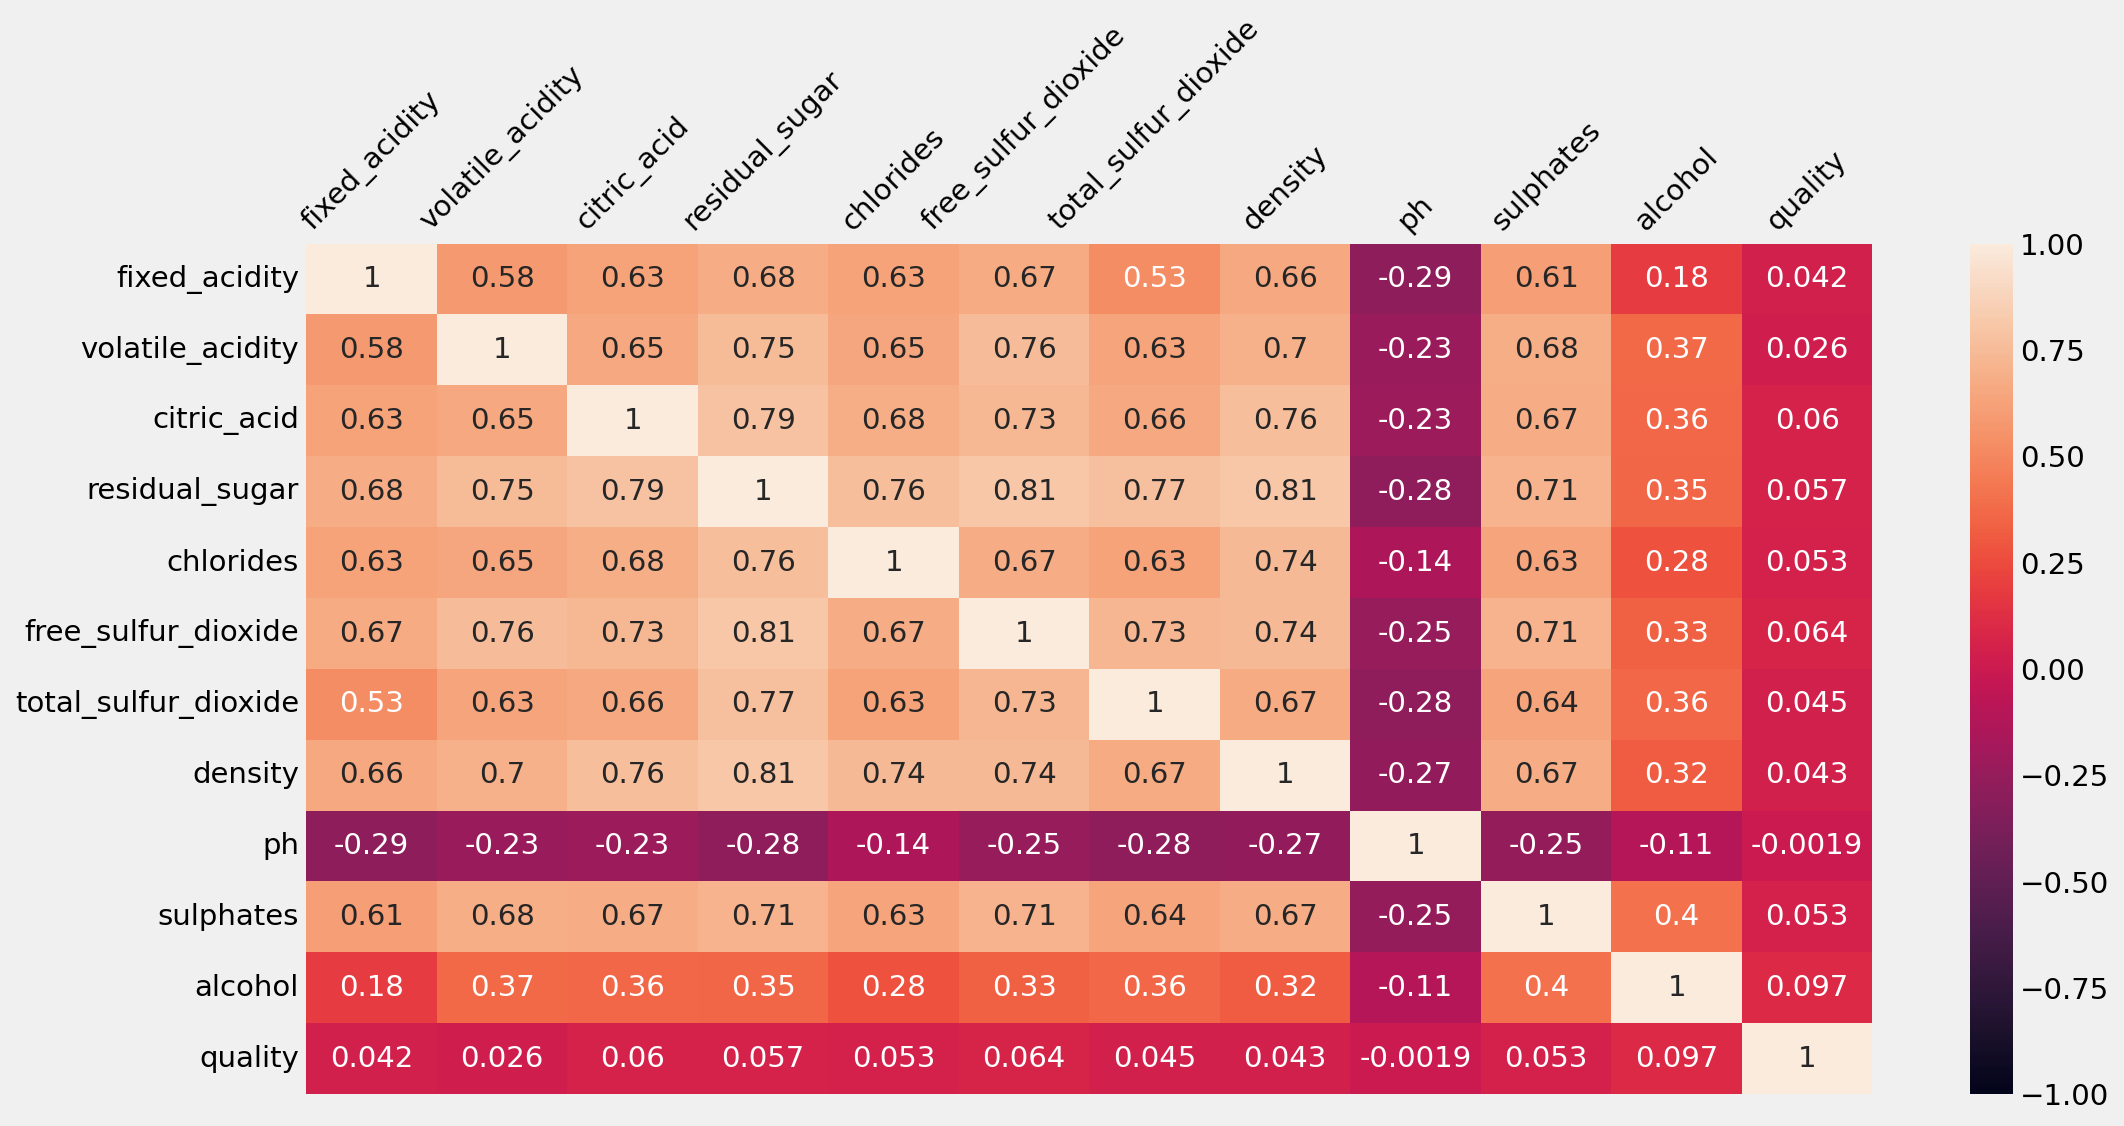

In [150]:
ax = sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)
plt.gcf().set_size_inches(15, 7)
plt.gcf().set_dpi(150)
ax.xaxis.tick_top()
plt.xticks(rotation = 45);

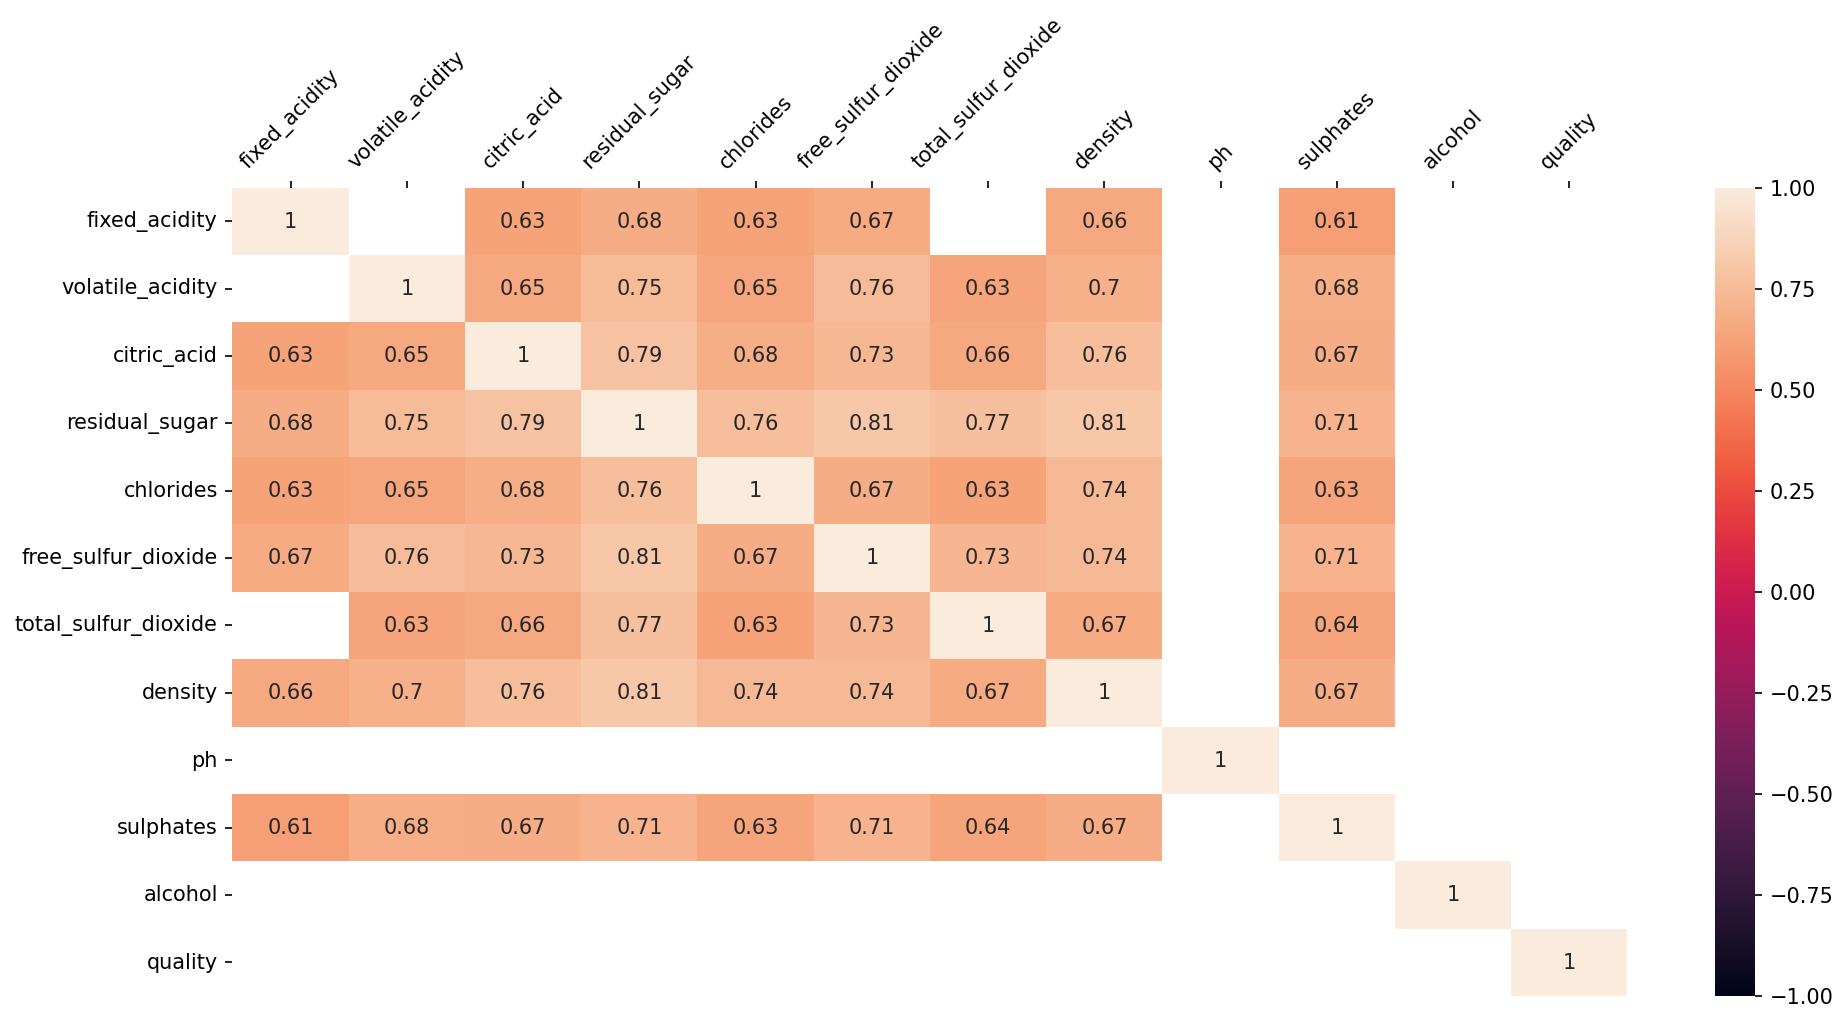

In [ ]:
corr_matris = data.corr()
ax = sns.heatmap(data.corr(),
            annot = True, 
            vmin = -1, 
            vmax = 1, 
            mask = ((corr_matris < 0.60) & (corr_matris > -0.60)).values)
plt.gcf().set_size_inches(15, 7)
plt.gcf().set_dpi(150)
ax.xaxis.tick_top()
plt.xticks(rotation = 45);


## Distribution of Features

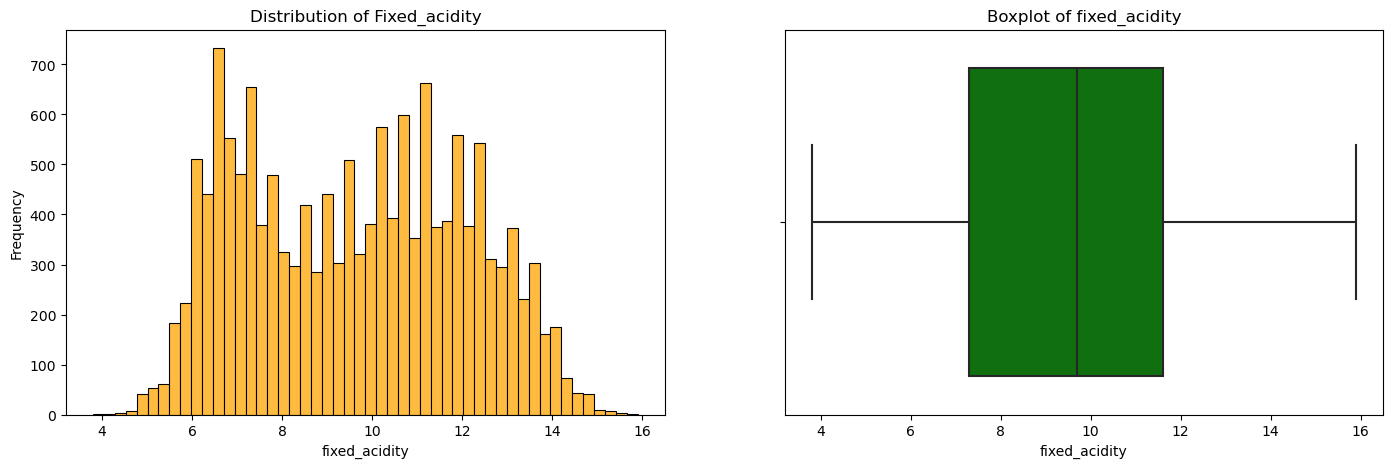

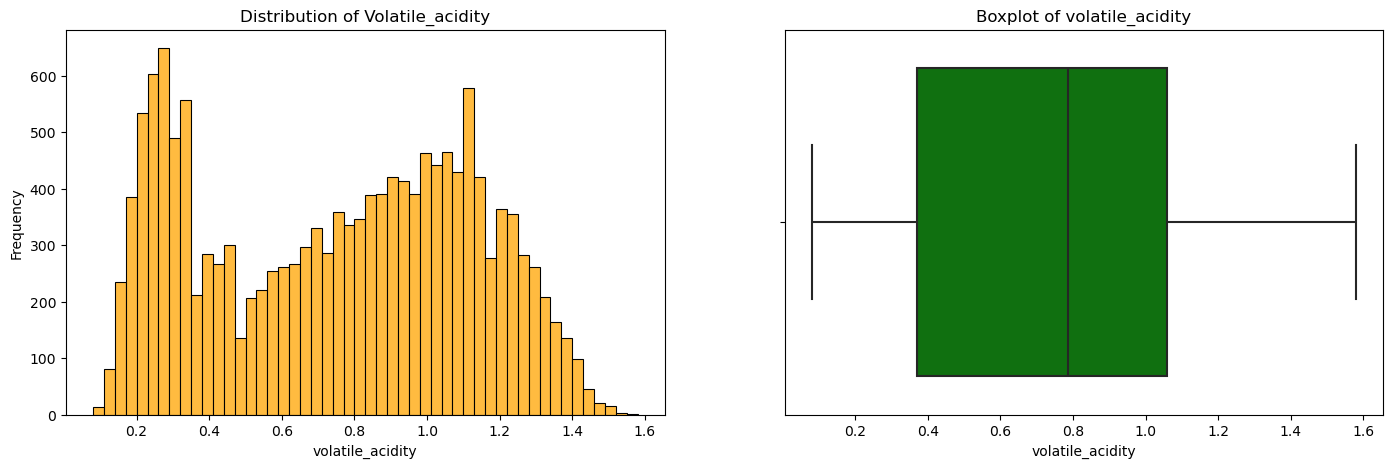

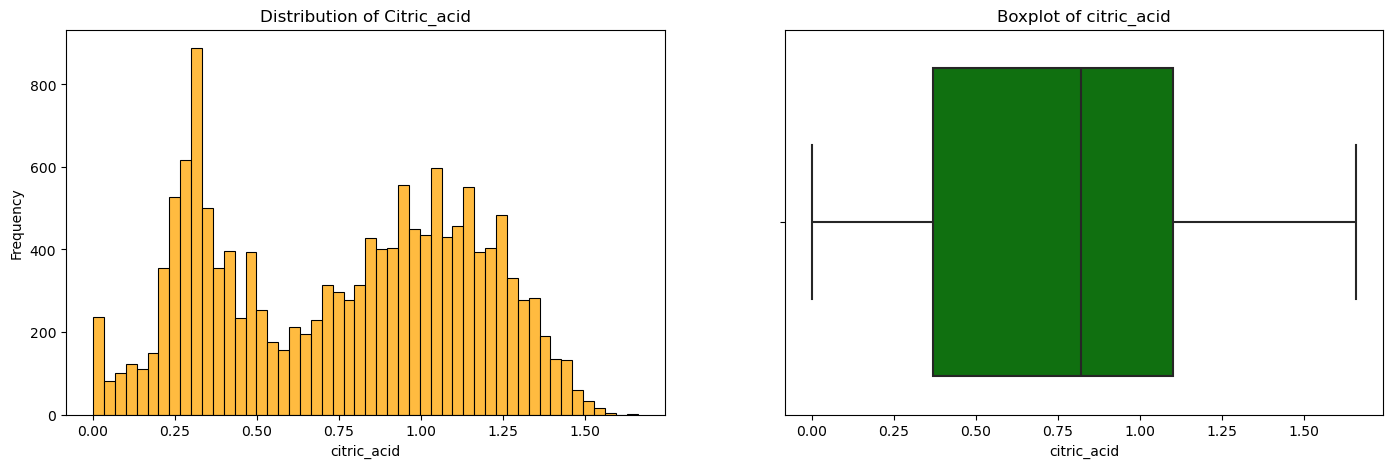

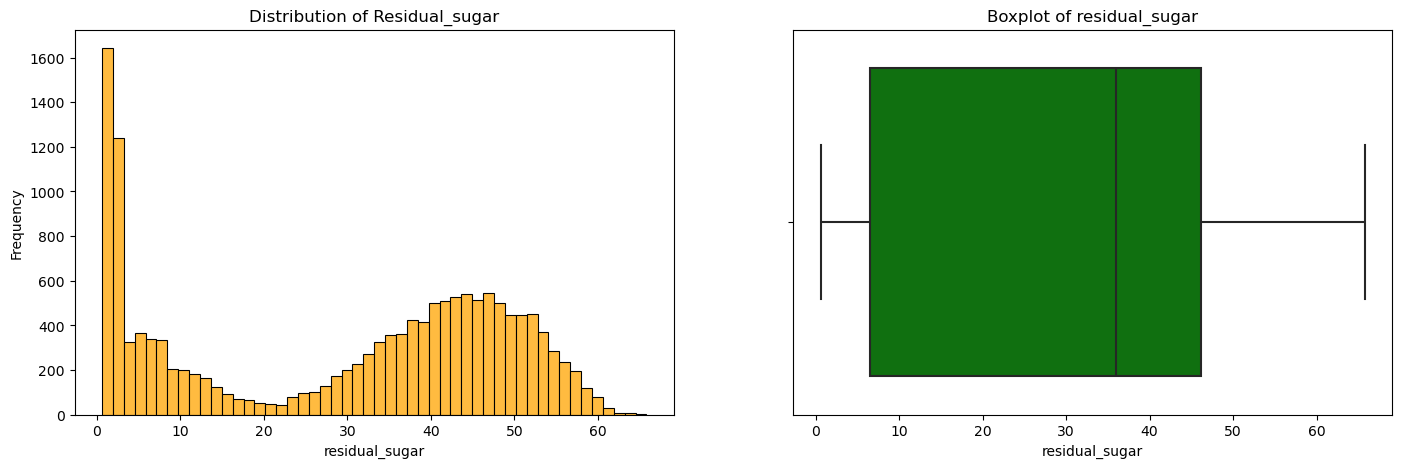

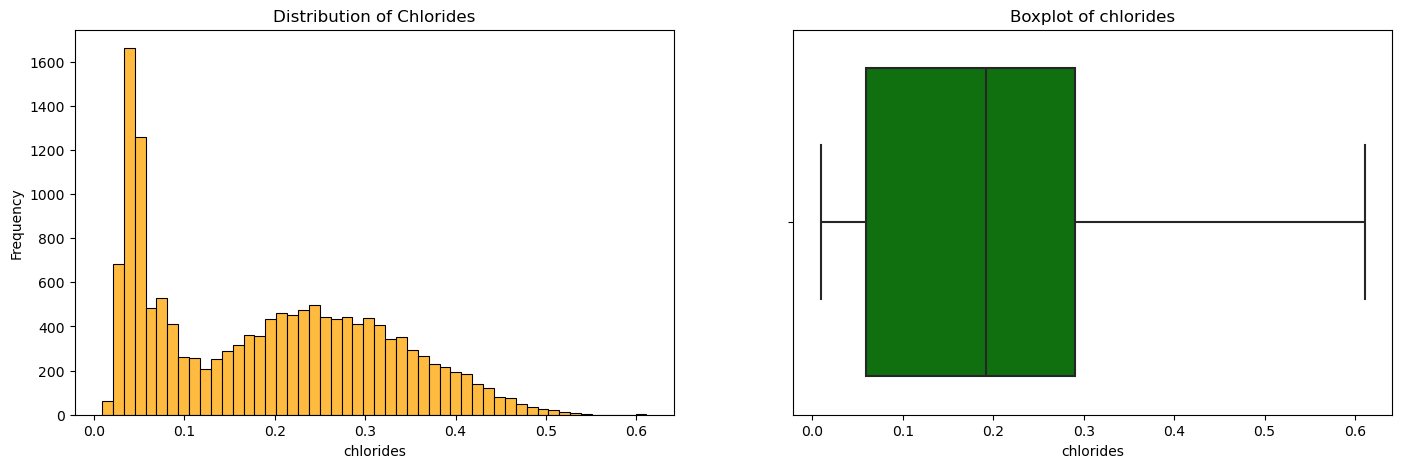

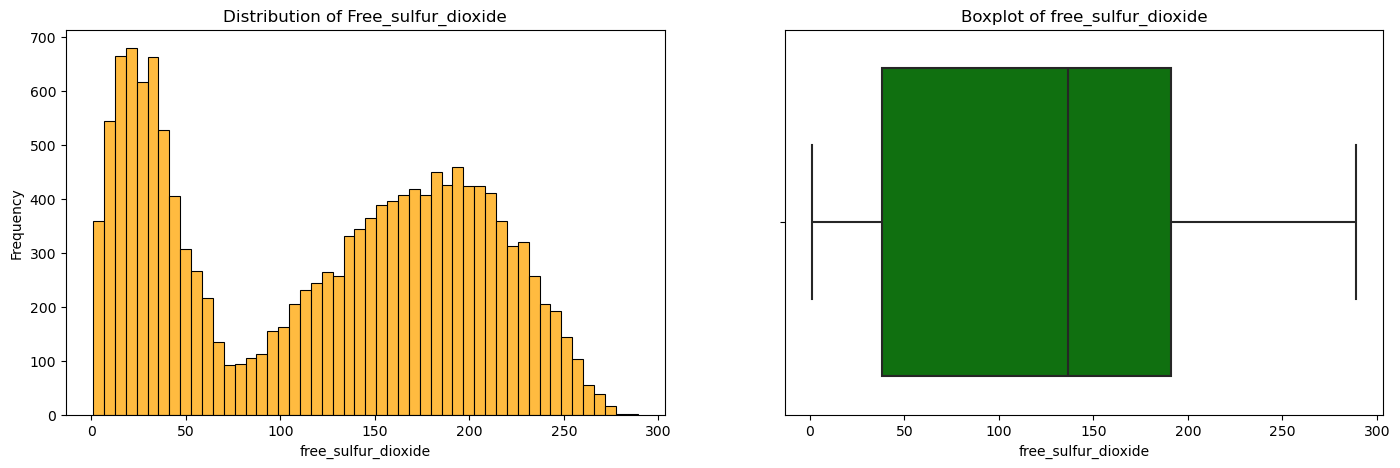

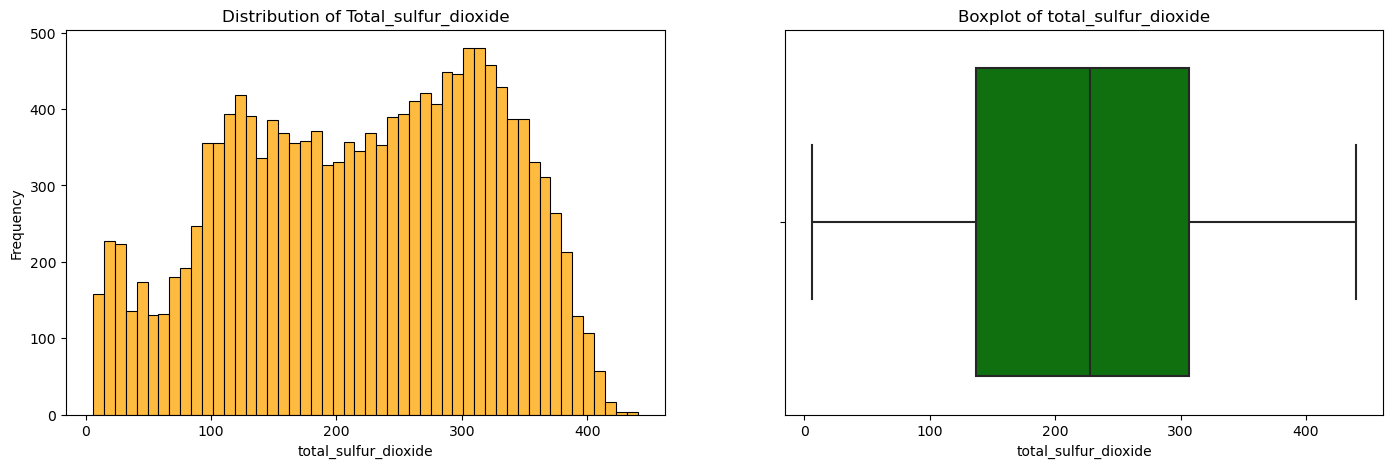

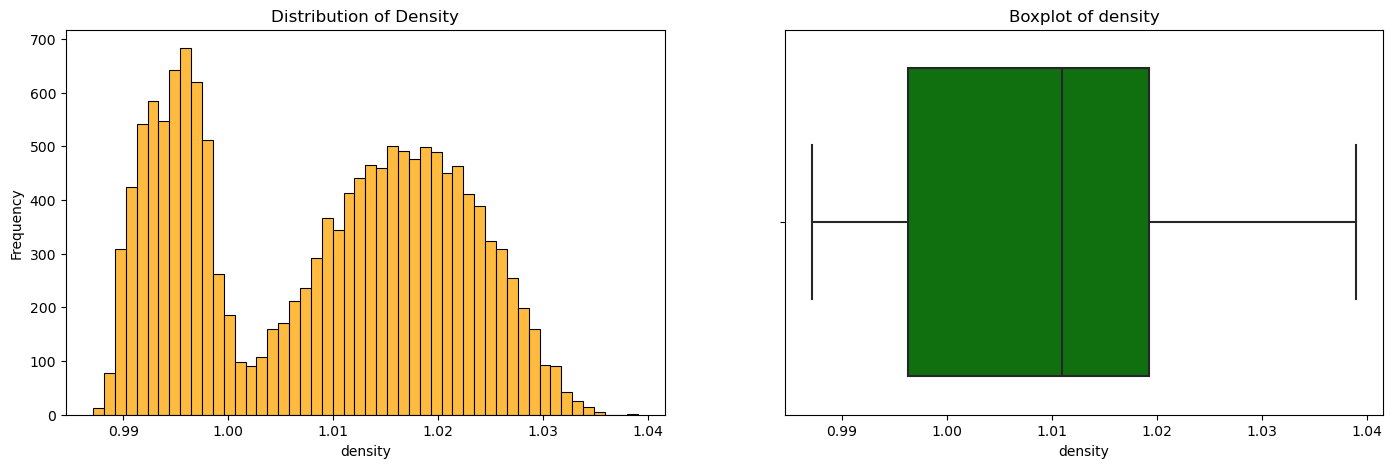

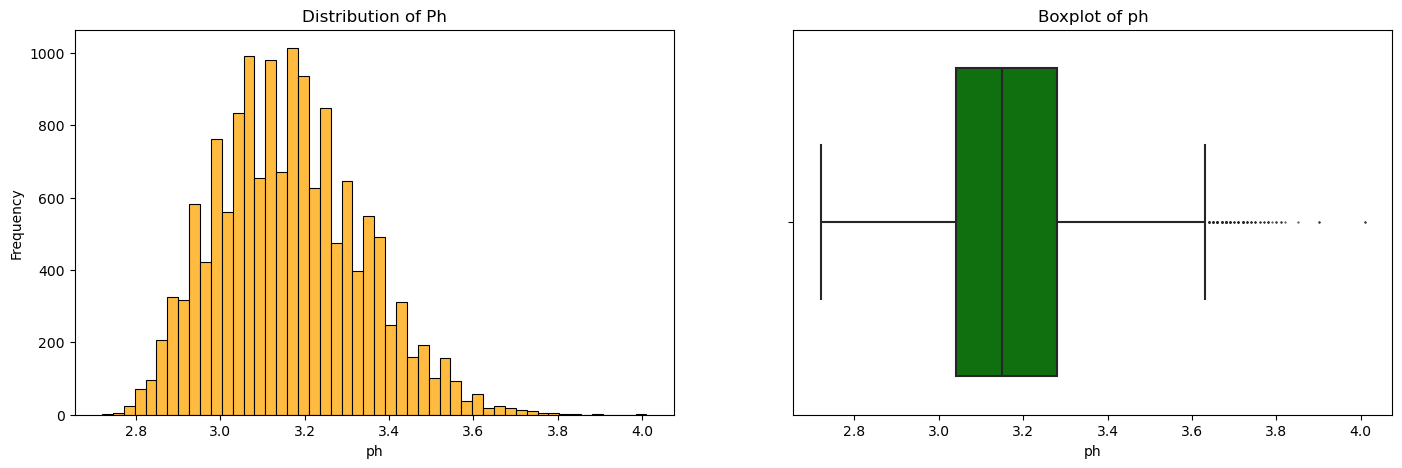

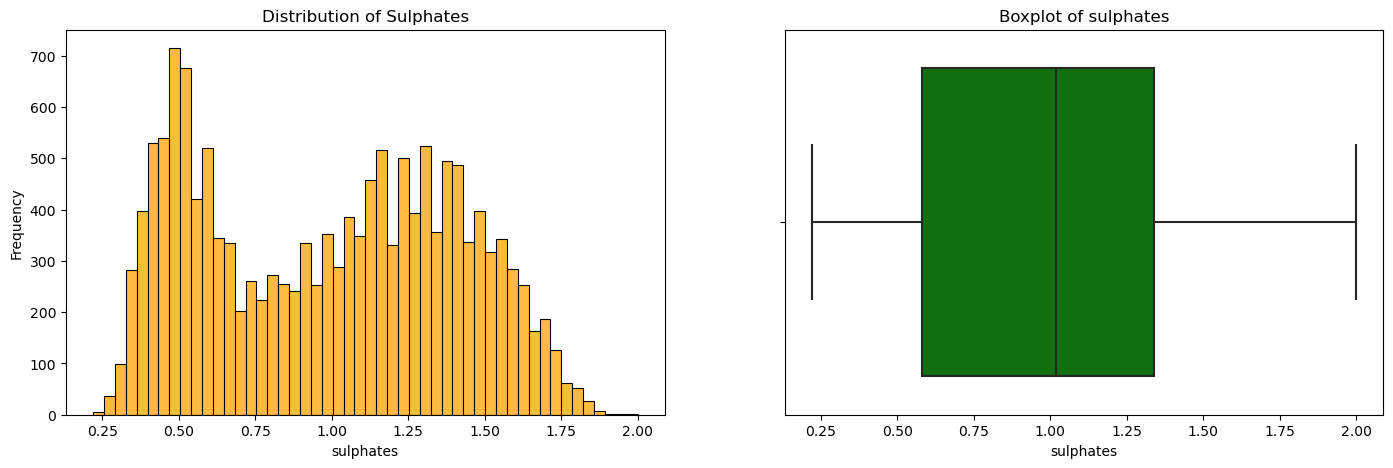

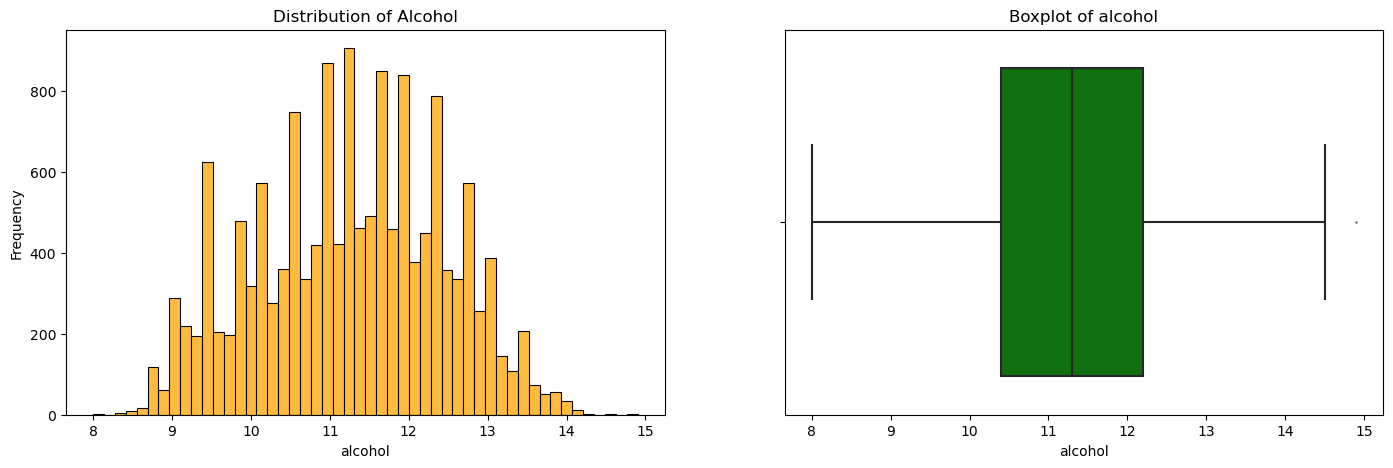

In [153]:
for col in data.drop("quality", axis = 1).columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (17, 5))
    sns.histplot(data[col], kde = False, color = "orange", ax = ax1, bins = 50)
    ax1.set_title(f"Distribution of {col.capitalize()}")
    ax1.set_ylabel("Frequency")

    sns.boxplot(x = data[col], fliersize = 0.5, ax = ax2, color = "green", linewidth = 1.5)
    ax2.set_title(f"Boxplot of {col}")

## Distribution of Target Variable

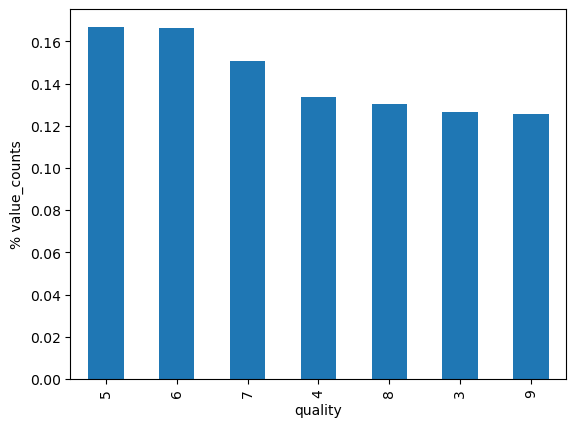

In [154]:
data.quality.value_counts(normalize = True).plot(kind = "bar")
plt.ylabel("% value_counts");

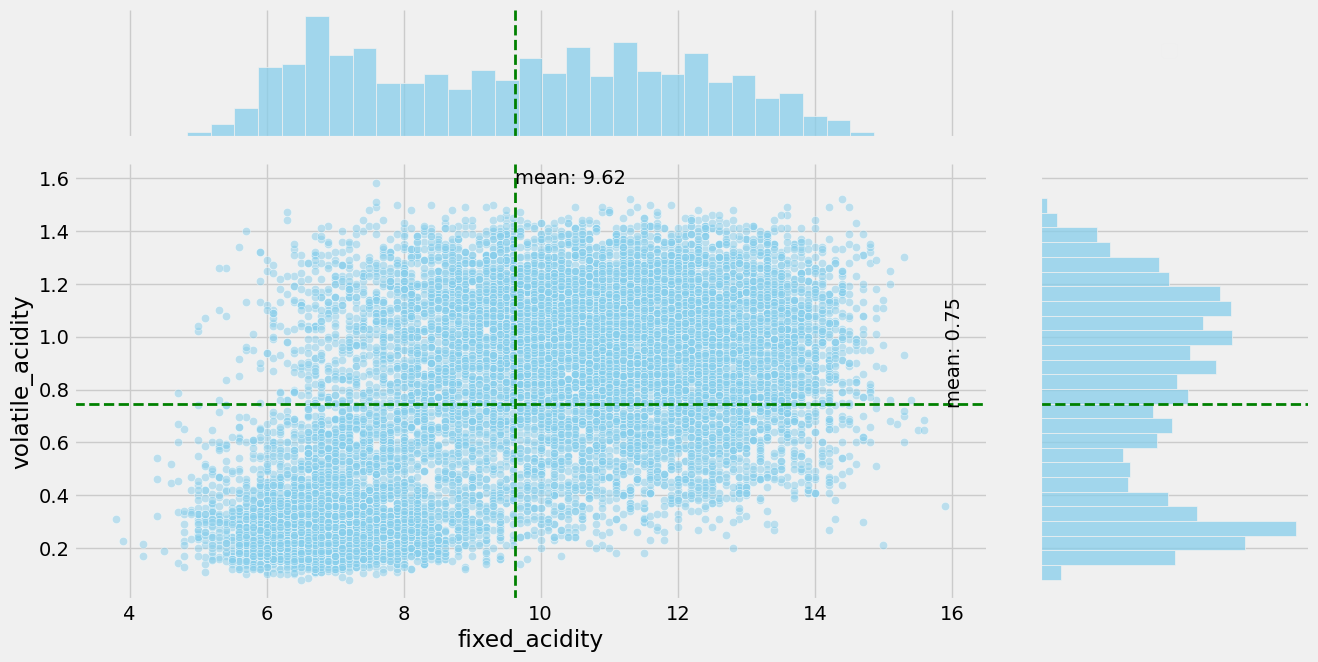

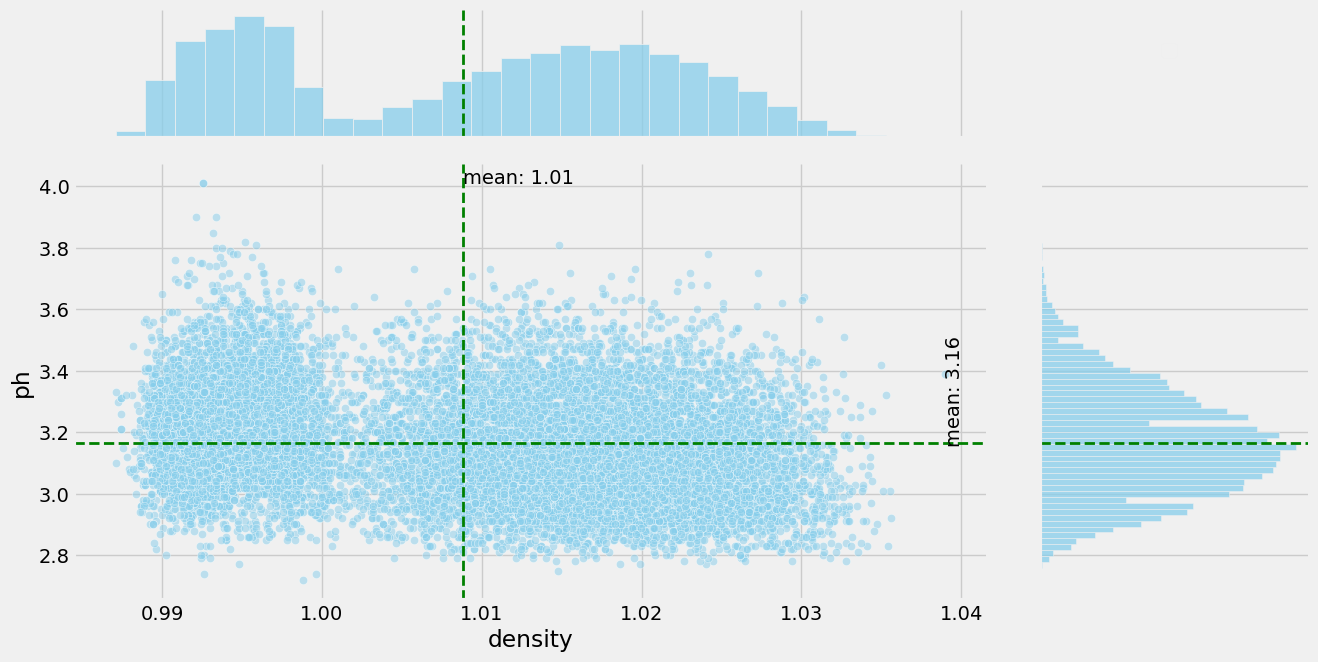

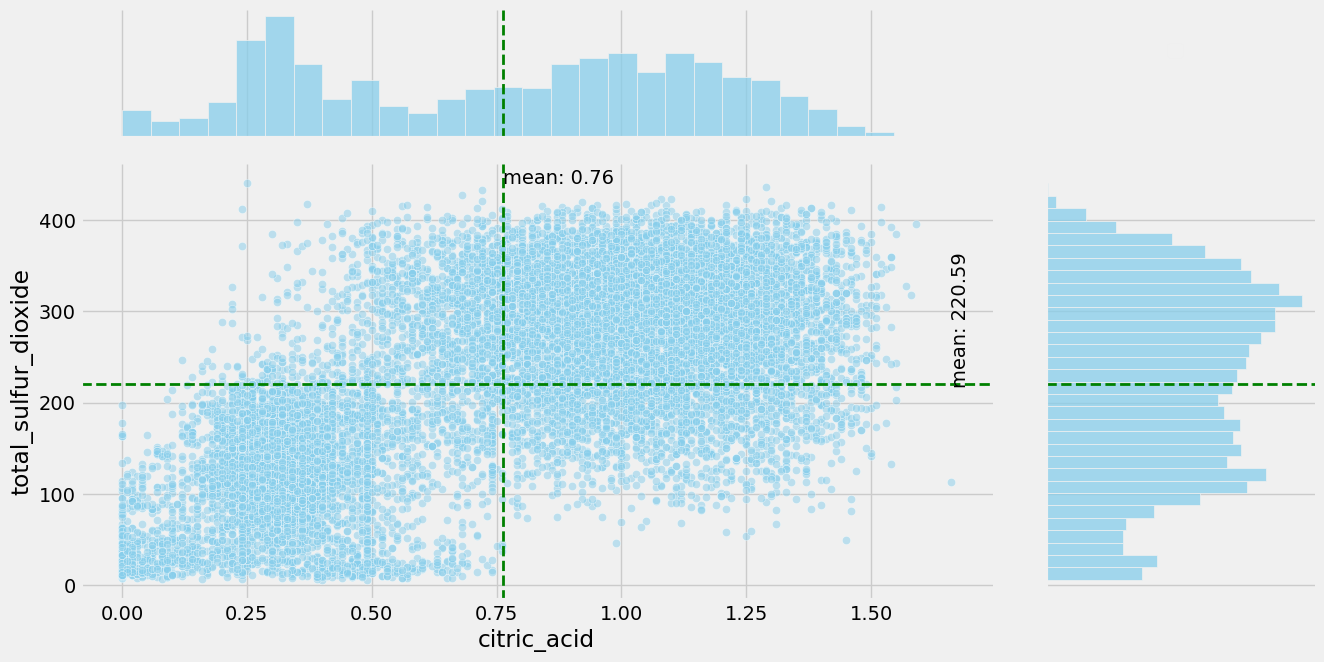

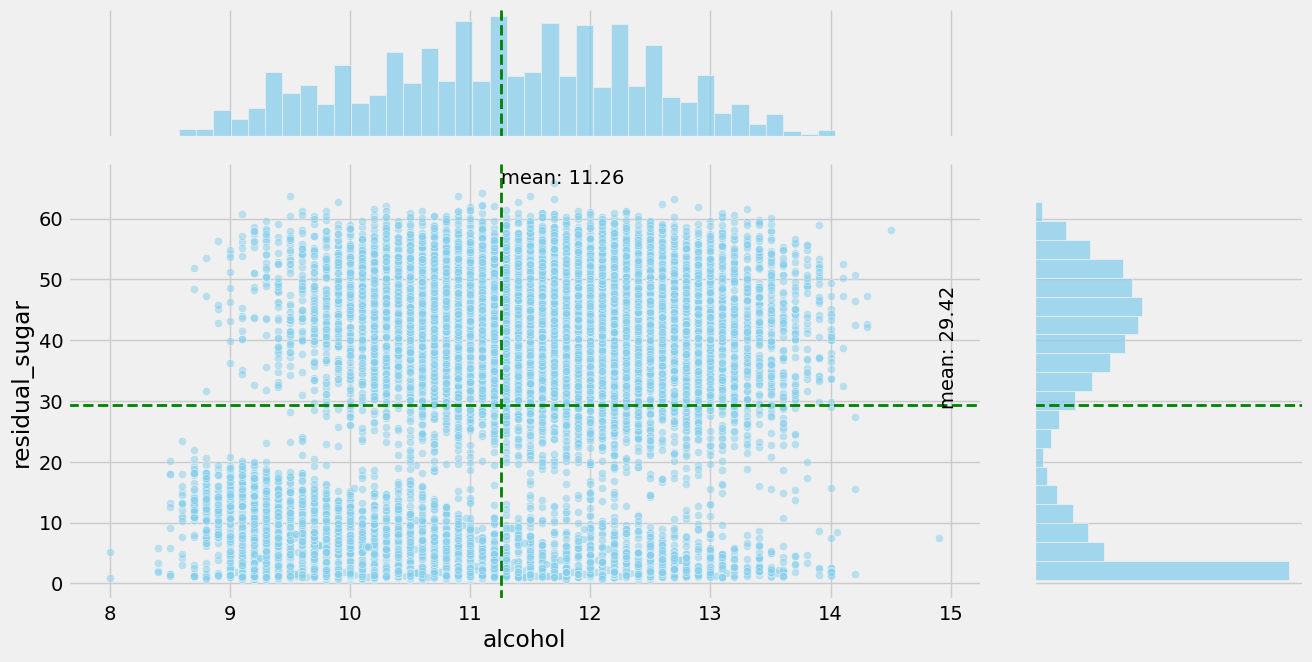

In [155]:
def joint_plot(x, y):
    
    plt.style.use("fivethirtyeight")
    plot = sns.jointplot(data = data, x = x, y = y, ratio = 3, alpha = 0.5, marginal_ticks=False, color = "skyblue")
    plot.refline(x=data[x].mean(), y=data[y].mean(), marginal=True, lw = 2, color = "green")
    plt.gcf().set_size_inches(15, 7)
    plt.text(x = data[x].mean(), y = np.max(data[y]), s = f"mean: {data[x].mean():.2f}", fontdict={"color": "black"})
    plt.text(x = np.max(data[x]), y = data[y].mean(), s = f"mean: {data[y].mean():.2f}", fontdict={"color": "black", "rotation": 90})
    plt.legend(loc = "upper center", bbox_to_anchor = (1.20, 1.30), ncols = 2,  framealpha = 0.01)
    plt.grid("off")


joint_plot("fixed_acidity", "volatile_acidity")
joint_plot("density", "ph")
joint_plot("citric_acid", "total_sulfur_dioxide")
joint_plot("alcohol", "residual_sugar")

## Distribution of Features by Target Variables

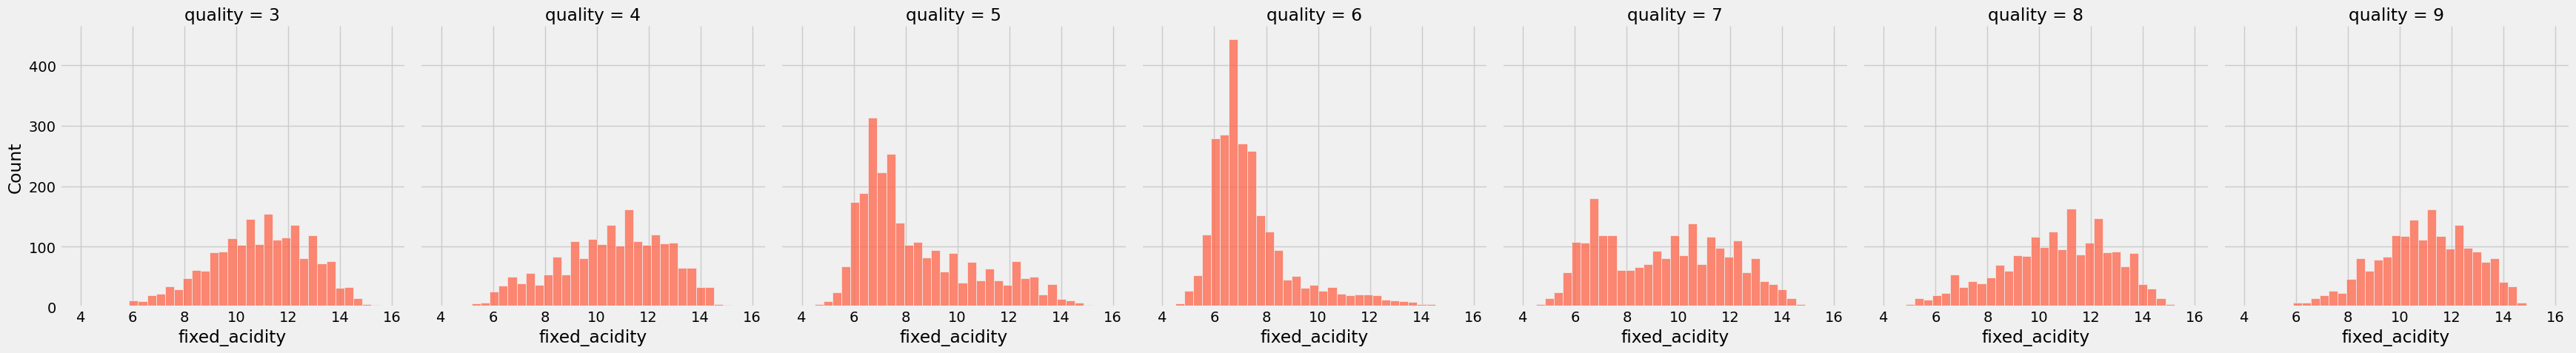

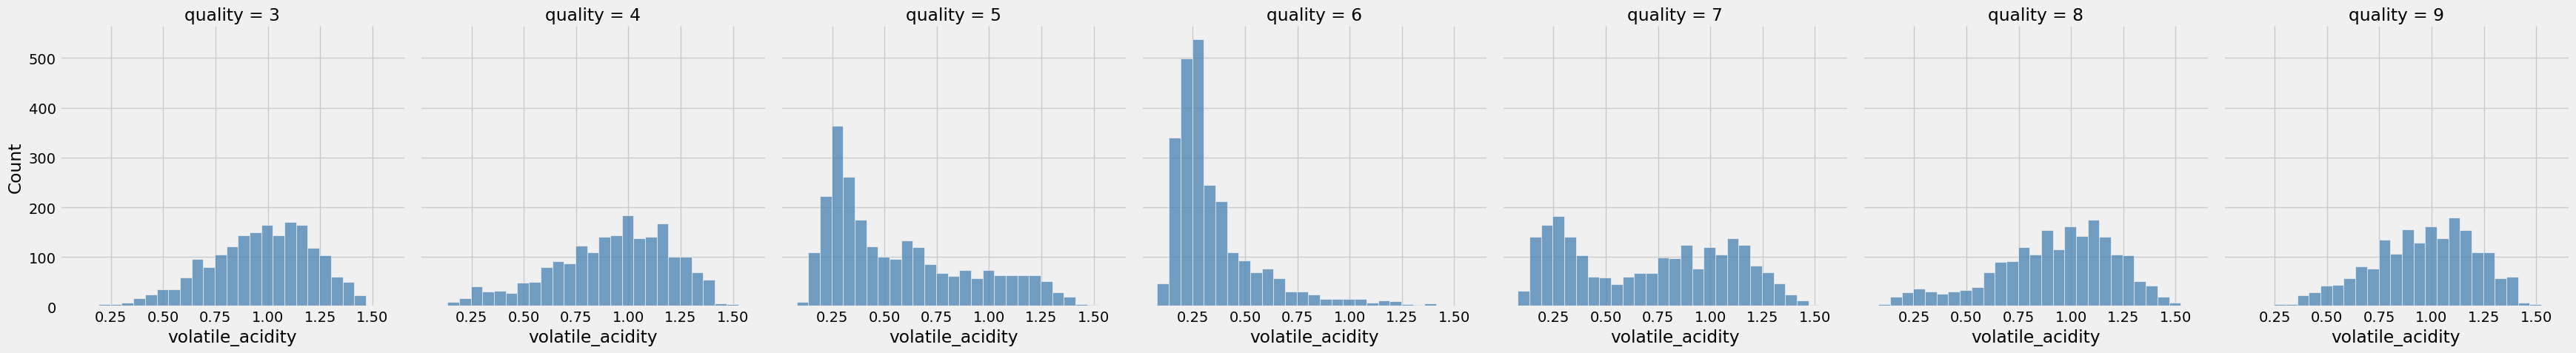

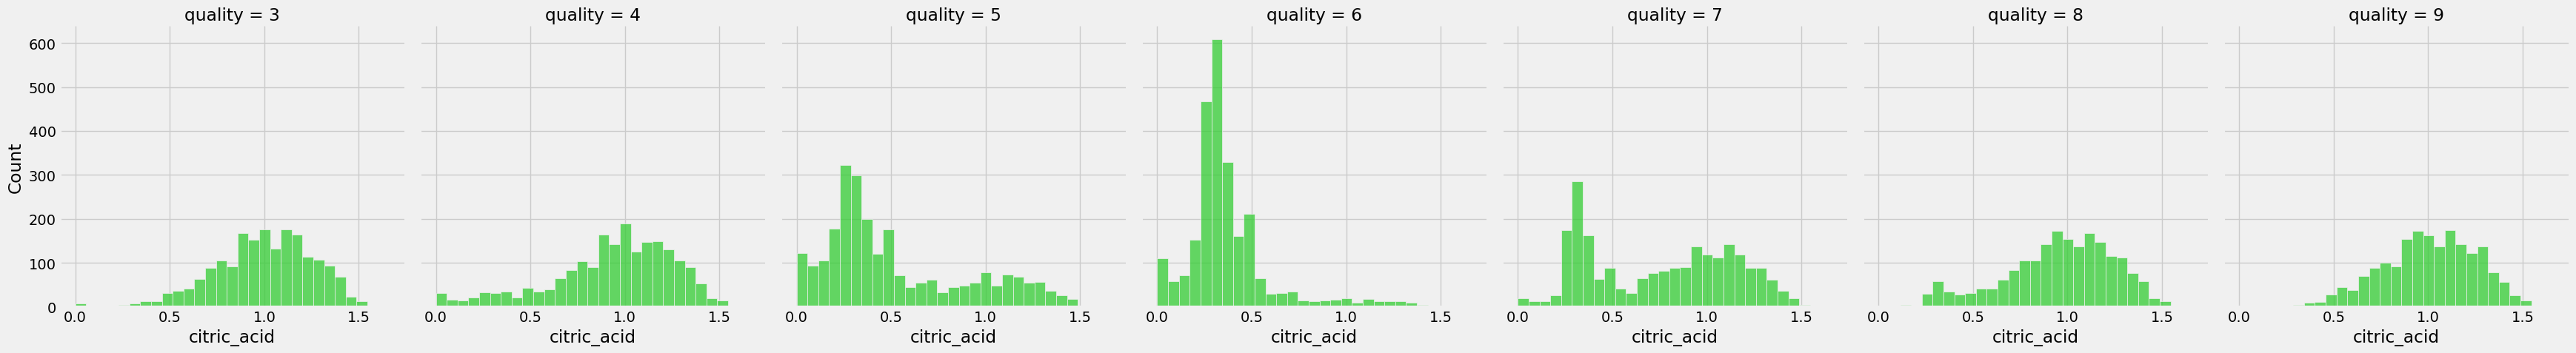

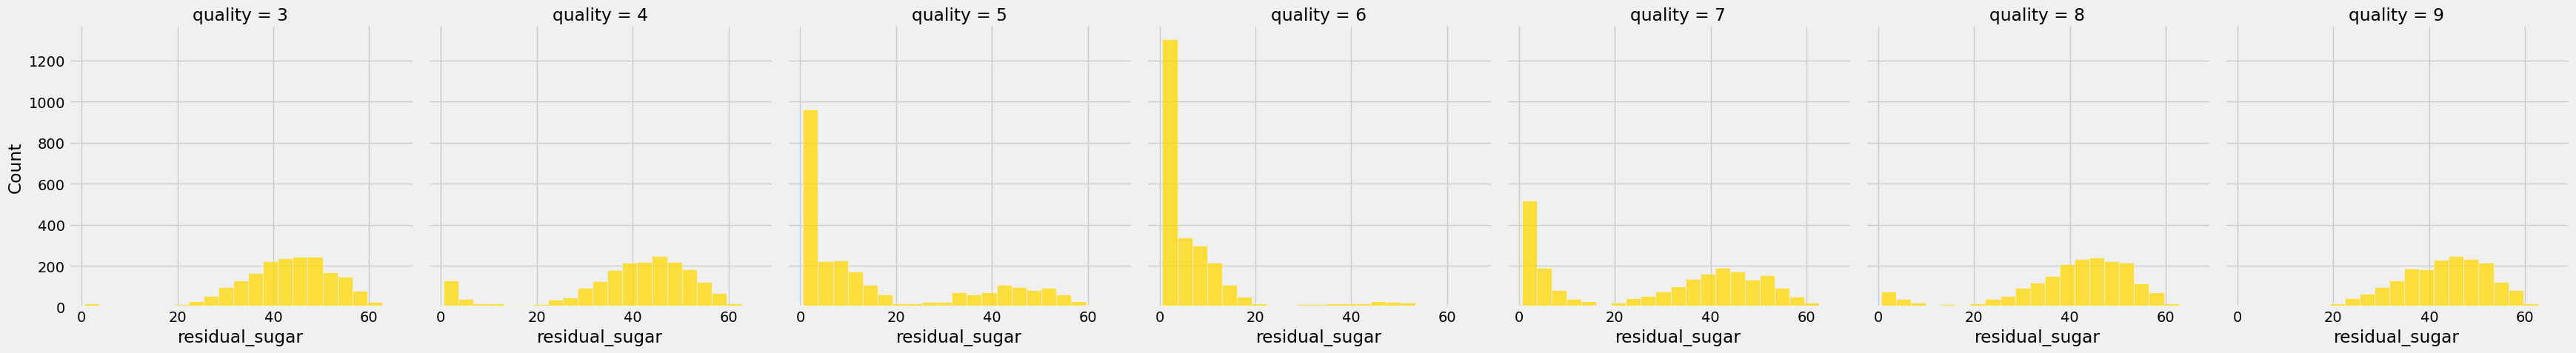

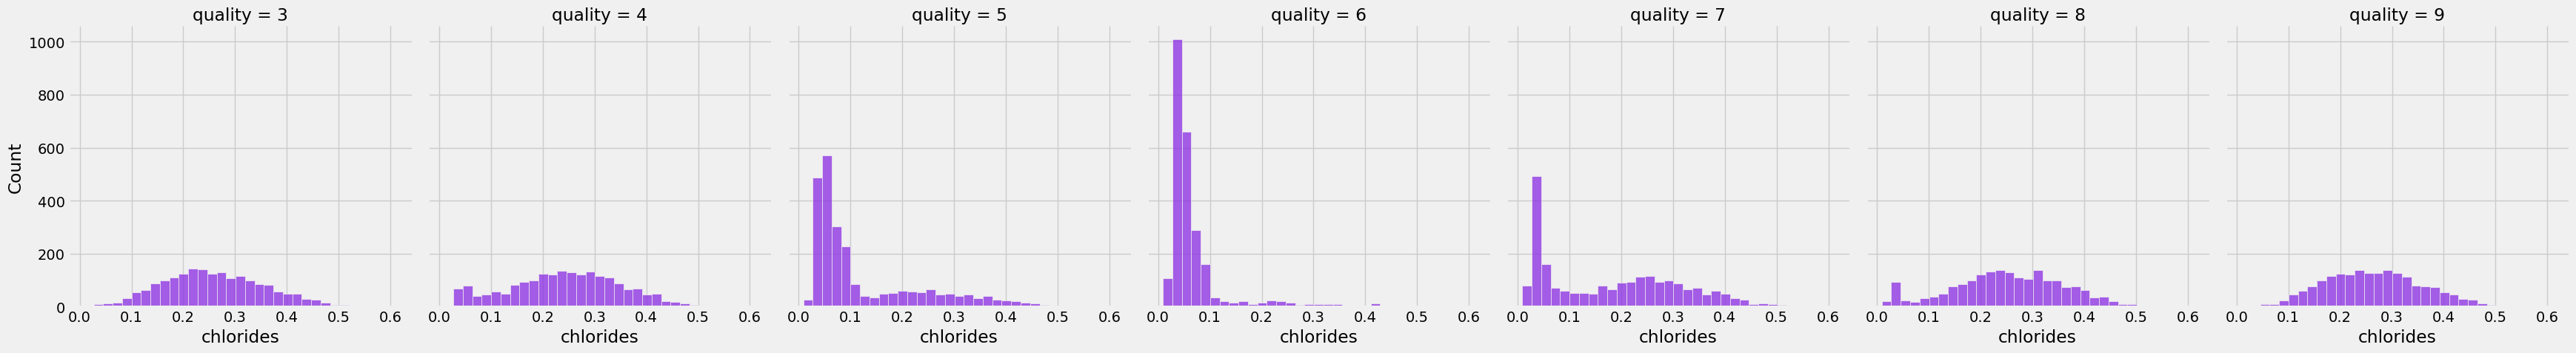

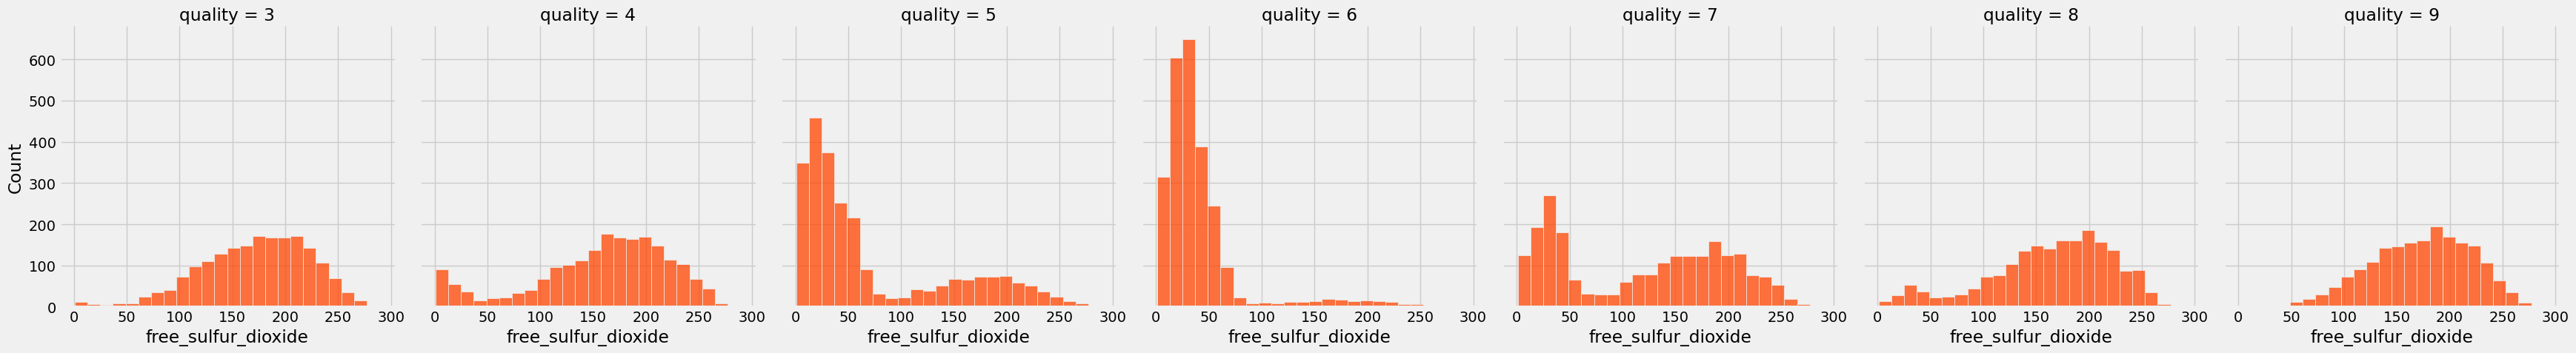

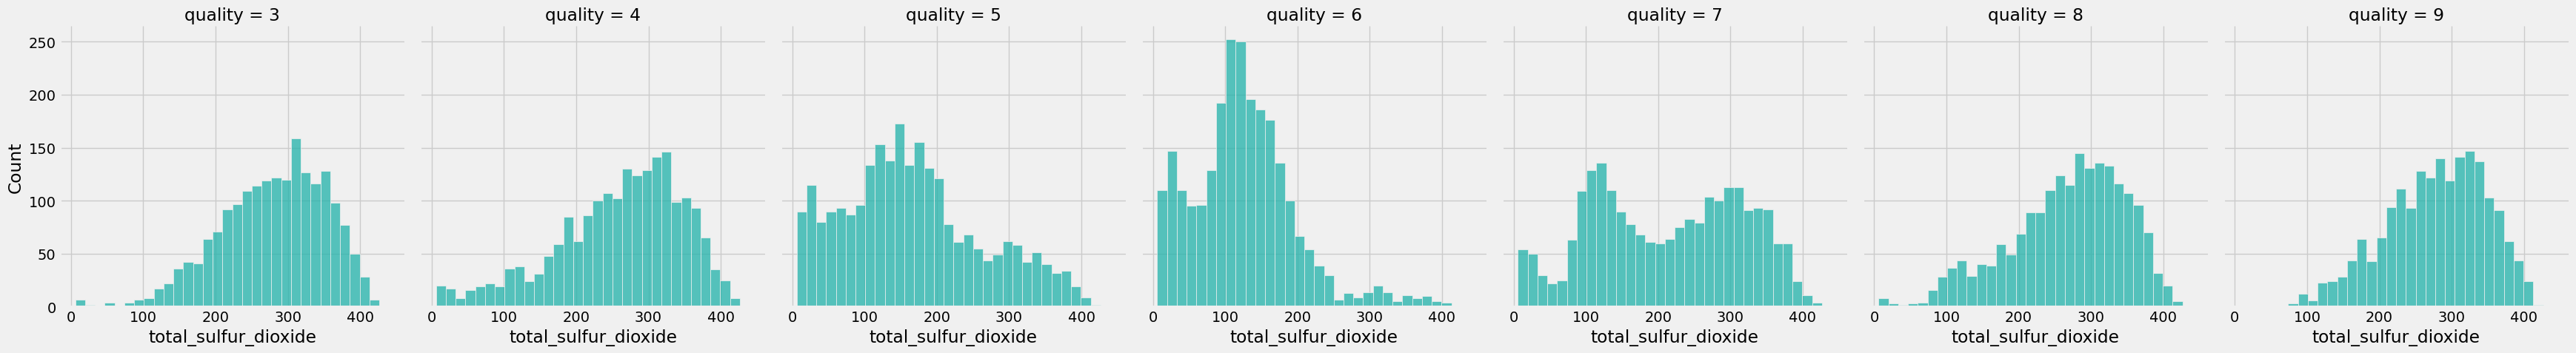

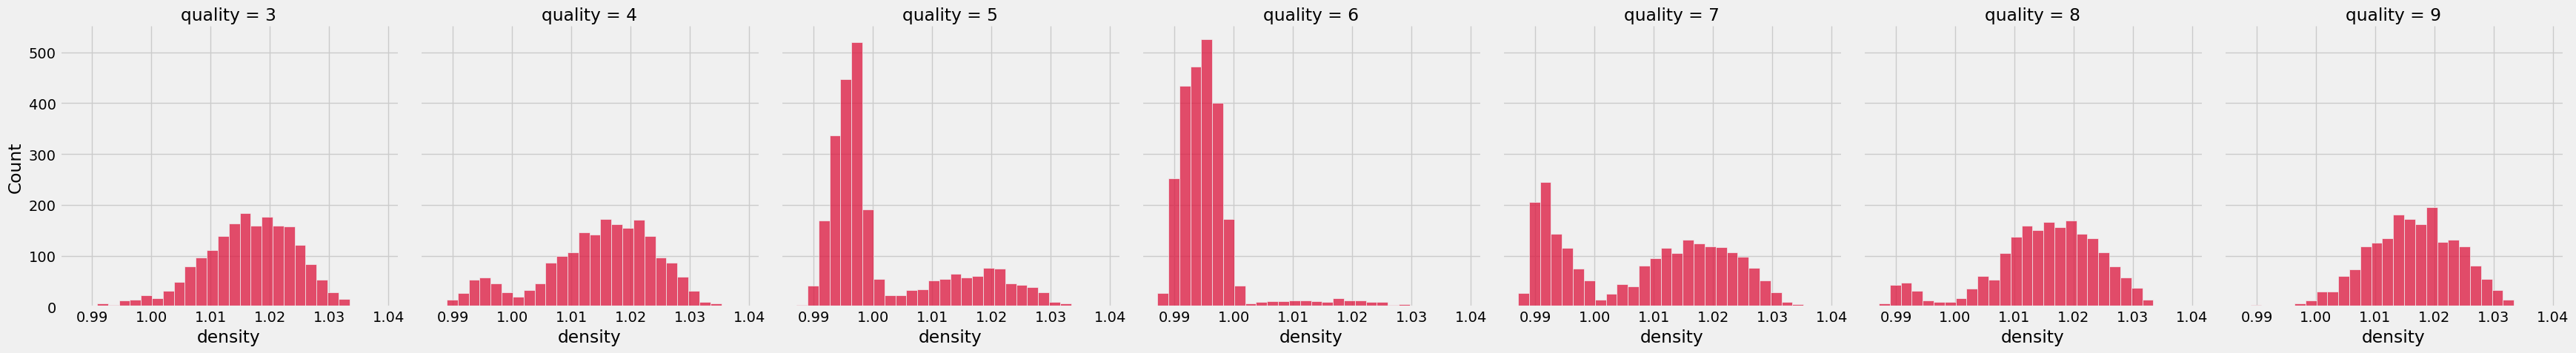

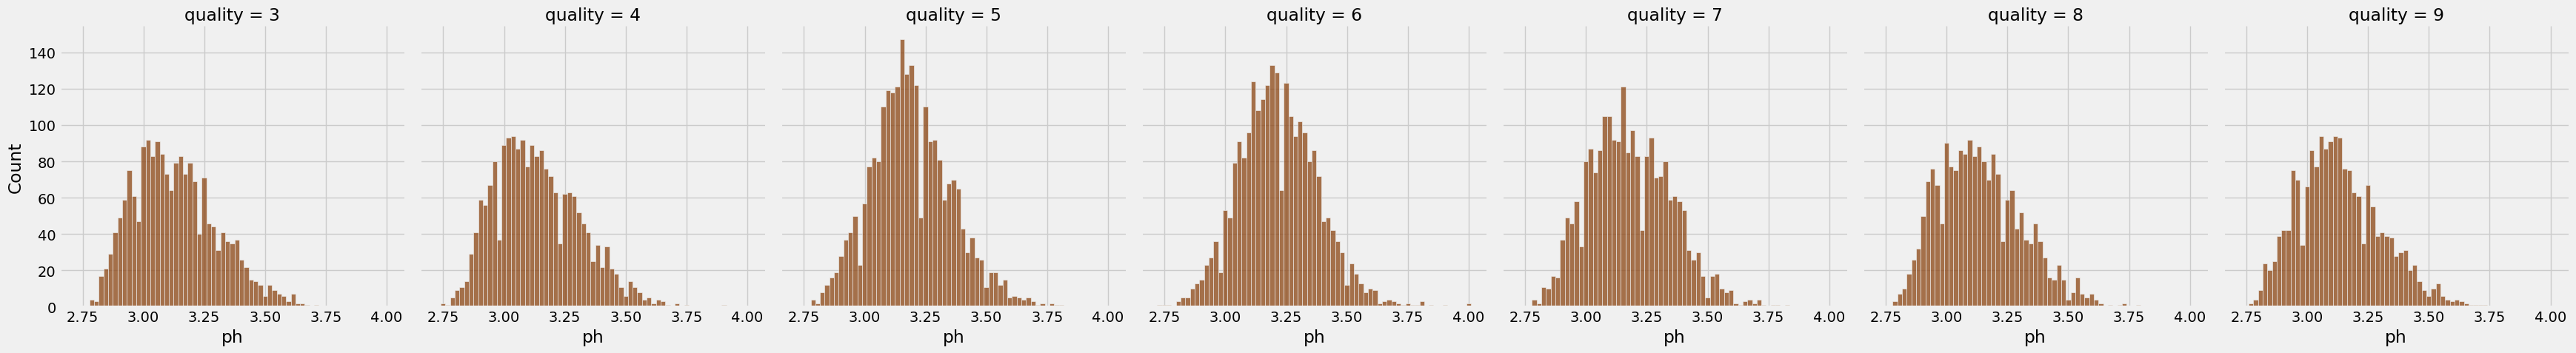

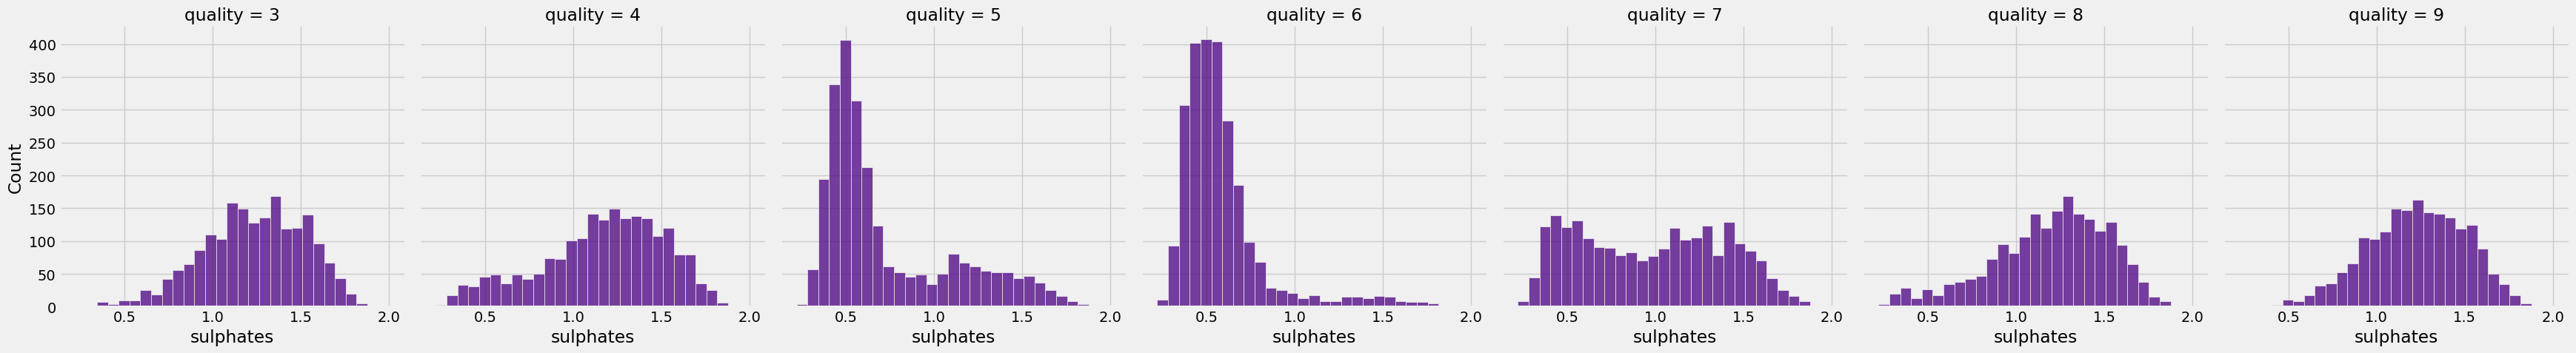

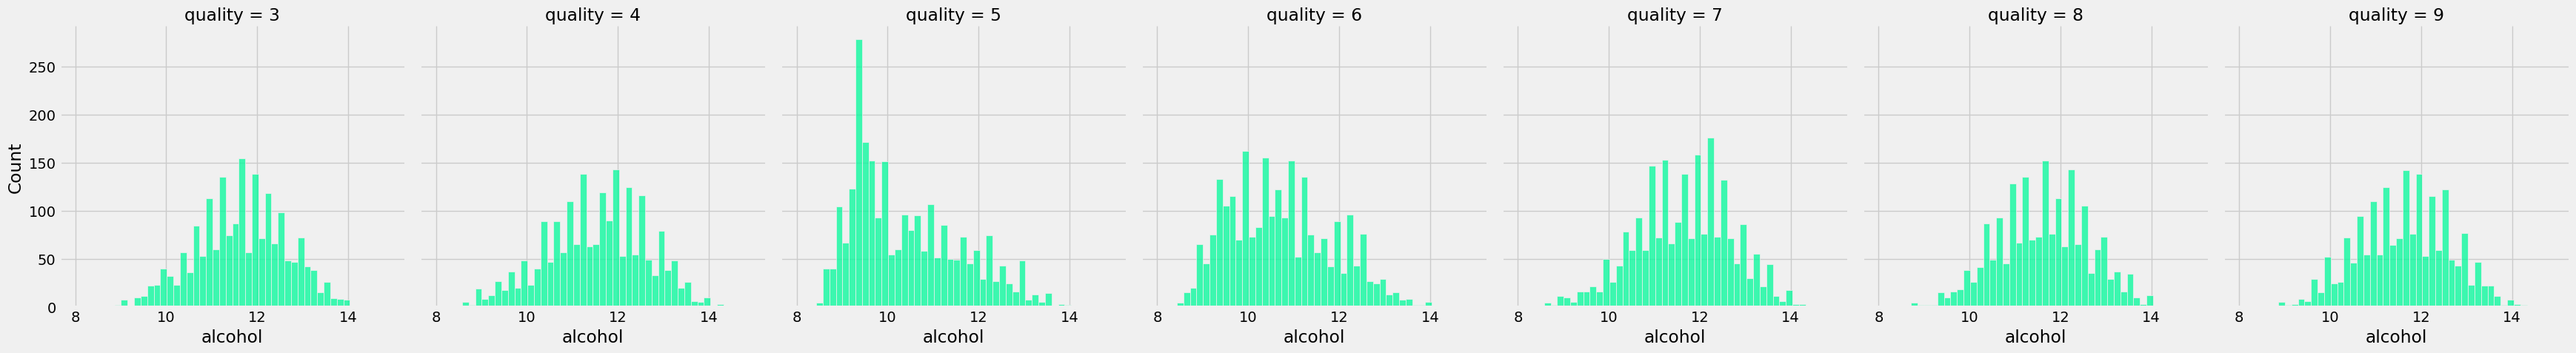

In [156]:
colors = [
    "#FF6347",  
    "#4682B4",  
    "#32CD32",  
    "#FFD700",  
    "#8A2BE2",  
    "#FF4500",  
    "#20B2AA",  
    "#DC143C",  
    "#8B4513",  
    "#4B0082", 
    "#00FA9A", 
]

for col, color in zip(data.drop("quality", axis = 1).columns.values.tolist(), colors):
    
    sns.displot(data = data, 
                x = col, 
                col = "quality",  
                multiple = "stack",
                color = color,
                legend=False);


## Splitting Dataset

In [159]:
x = data.drop("quality", axis = 1)
y = data["quality"]
print(x.shape, y.shape)

(21000, 11) (21000,)


## Mutual Info Regression

In [128]:
from sklearn.feature_selection import mutual_info_regression

mir = mutual_info_regression(x, y, random_state = 365)
mir = pd.Series(data = mir, index = x.columns.values.tolist()).sort_values(ascending = False).to_frame(name = "MI Scores");mir

,MI Scores
density,0.532839
free_sulfur_dioxide,0.478189
total_sulfur_dioxide,0.461144
residual_sugar,0.387192
chlorides,0.336675
citric_acid,0.288610
volatile_acidity,0.275621
sulphates,0.273644
fixed_acidity,0.200925
alcohol,0.132226


In [129]:
data.skew().to_frame(name = "skewness").sort_values(by = "skewness")

,skewness
residual_sugar,-0.439900
total_sulfur_dioxide,-0.285695
citric_acid,-0.223086
free_sulfur_dioxide,-0.194027
volatile_acidity,-0.179346
density,-0.160214
alcohol,-0.122616
sulphates,-0.086266
fixed_acidity,-0.008329
quality,0.000000


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


In [130]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(16800, 11)
(4200, 11)
(16800,)
(4200,)


## Hyperparameter Tuning

In [40]:
import optuna

In [111]:
from lightgbm import LGBMClassifier

In [ ]:

def objective(trial: optuna.Trial):
    params = {
        "max_depth" : trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "n_estimators": trial.suggest_int('n_estimators', 500, 5000),
        "subsample": trial.suggest_float('subsample', 0.8, 1.0),
        "colsample_bytree": trial.suggest_float('colsample_bytree', 0.6, 1.0),
        # "gamma": trial.suggest_float('gamma', 0, 0.5),
        "reg_alpha": trial.suggest_float('reg_alpha', 0.1, 1.5),
        "reg_lambda": trial.suggest_float('reg_lambda', 0.1, 1.5),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 30),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150)

    }

    model = LGBMClassifier(
        objective = "softmax",
        num_class = 7,
        **params
    )
    
    scores = cross_val_score(
        model,
        x_train,
        y_train,
        cv = 5,
        scoring = "accuracy",
        n_jobs= -1 
    )
    
    # print(scores.mean())
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials = 25)


print(f"{study.best_params}")

In [142]:
model_lgbm = LGBMClassifier(
    objective = "softmax",
    num_class = 7,
    **study.best_params
    )

model_lgbm.fit(x_train, y_train)
pd.Series(model_lgbm.score(x_test, y_test), index = ["test score"])

test score    0.608571
dtype: float64